<h4>Complete Data Analysis Of DiwaliSales Data </h4>

<h4> OBJECTIVE : IMPROVE CUSTOMER EXPERIENCE BY ANALYSING SALES DATA AND INCREASE REVENUE </h4>

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df=pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape', header=0)


In [5]:
df

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [6]:
df.shape


(11251, 14)

<h4> DATA CLEANING & TRANSFORMATION </h4> 

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


<h4>how many non null values are there</h4> 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


<h4>Marital_Status column has 0 and 1 , i want to change that to unmarried for 0 and married for 1 and place them in new column</h4>

In [9]:
def change_names(Status):
    if Status == 0 :
        return "Unmarried"
    elif Status == 1 :
        return "Married"

df["Mar_Status"] = df["Marital_Status"].apply(change_names)

<h4> Status and unnamed are blank columns , Marital_Status column is not required, so i want to delete Columns in dataframe Permanently </h4>

In [10]:
df.drop(["Status","Unnamed","Marital_Status"],axis=1,inplace=True)

In [11]:
# i want to change the column Marital_Status to Married 
df.rename(columns={"Mar_Status":"Marital_Status"},inplace=True)

In [12]:
#checking whether columns are deleted 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   State             11251 non-null  object 
 6   Zone              11251 non-null  object 
 7   Occupation        11251 non-null  object 
 8   Product_Category  11251 non-null  object 
 9   Orders            11251 non-null  int64  
 10  Amount            11239 non-null  float64
 11  Marital_Status    11251 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.0+ MB


<h4>rows which have null values</h4>

In [13]:
 
df.isnull().sum() #Amount has 12 rows with null values 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
Marital_Status       0
dtype: int64

In [14]:
df[df["Amount"].isnull()] 

,User_ID,Cust_name,Product_ID,Gender,Age,State,Zone,Occupation,Product_Category,Orders,Amount,Marital_Status
7,1002092,Shivangi,P00273442,F,61,Maharashtra,Western,IT Sector,Auto,1,NaN,Unmarried
14,1003858,Cano,P00293742,M,46,Madhya Pradesh,Central,Hospitality,Auto,3,NaN,Married
16,1005447,Amy,P00275642,F,48,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN,Married
109,1005265,Sakshi,P00296242,F,48,Delhi,Central,Banking,Footwear & Shoes,1,NaN,Married
111,1005261,Apoorva,P00057942,F,41,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN,Married
184,1005538,Kartik,P00269542,F,49,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN,Married
293,1000326,Jonathan,P00120542,M,53,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN,Unmarried
344,1002507,Lakshmi,P00045842,F,35,Gujarat,Western,Chemical,Furniture,1,NaN,Married
345,1004498,Srishti,P00030842,F,55,Delhi,Central,Textile,Footwear & Shoes,1,NaN,Unmarried
452,1004601,Gaurav,P00014442,F,40,Madhya Pradesh,Central,Hospitality,Food,4,NaN,Married


<h4>i want to fill the amount null values with average amount of that category</h4>

In [15]:

df["Amount"] = df.groupby("Product_Category")["Amount"].transform(lambda x:x.fillna(x.mean()))

In [16]:
#lets see whether null values of amount are filled with averages of category
df.isnull().sum()
df.loc[7]

User_ID                  1002092
Cust_name               Shivangi
Product_ID             P00273442
Gender                         F
Age                           61
State                Maharashtra
Zone                     Western
Occupation             IT Sector
Product_Category            Auto
Orders                         1
Amount              20191.855567
Marital_Status         Unmarried
Name: 7, dtype: object

In [17]:
#changing datatype of a Amount column to integer
df["Amount"]= df["Amount"].astype("int")


In [18]:
df

,User_ID,Cust_name,Product_ID,Gender,Age,State,Zone,Occupation,Product_Category,Orders,Amount,Marital_Status
0,1002903,Sanskriti,P00125942,F,28,Maharashtra,Western,Healthcare,Auto,1,23952,Unmarried
1,1000732,Kartik,P00110942,F,35,Andhra Pradesh,Southern,Govt,Auto,3,23934,Married
2,1001990,Bindu,P00118542,F,35,Uttar Pradesh,Central,Automobile,Auto,3,23924,Married
3,1001425,Sudevi,P00237842,M,16,Karnataka,Southern,Construction,Auto,2,23912,Unmarried
4,1000588,Joni,P00057942,M,28,Gujarat,Western,Food Processing,Auto,2,23877,Married
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,Maharashtra,Western,Chemical,Office,4,370,Married
11247,1004089,Reichenbach,P00171342,M,33,Haryana,Northern,Healthcare,Veterinary,3,367,Unmarried
11248,1001209,Oshin,P00201342,F,40,Madhya Pradesh,Central,Textile,Office,4,213,Unmarried
11249,1004023,Noonan,P00059442,M,37,Karnataka,Southern,Agriculture,Office,3,206,Unmarried


In [19]:
df[["Age","Orders","Amount"]].describe()


,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


<h4> My orders are ranging from Min 1 to Max 4 ,
My Minimum Order Amount Ranging From 188 rs to 23952 rs ,
My Customers Age Ranging From 12 yrs to 92 yrs ,
Average Age of my customers is 35 yr , Average Amount is 9460 rs </h4>

<h4>i want to categorize the ages of my customer</h4>

In [20]:


def categorize(age):
    if age <= 17 :
        return "0-17" 
    elif age <=25 :
        return "18-25"
    elif age <=35 :
        return "26-35" 
    elif age <=45 :
        return "36-45"
    elif age <=55 :
        return "46-55"
    else :
        return "55+"

df["Age_Group"] = df["Age"].apply(categorize)
df

,User_ID,Cust_name,Product_ID,Gender,Age,State,Zone,Occupation,Product_Category,Orders,Amount,Marital_Status,Age_Group
0,1002903,Sanskriti,P00125942,F,28,Maharashtra,Western,Healthcare,Auto,1,23952,Unmarried,26-35
1,1000732,Kartik,P00110942,F,35,Andhra Pradesh,Southern,Govt,Auto,3,23934,Married,26-35
2,1001990,Bindu,P00118542,F,35,Uttar Pradesh,Central,Automobile,Auto,3,23924,Married,26-35
3,1001425,Sudevi,P00237842,M,16,Karnataka,Southern,Construction,Auto,2,23912,Unmarried,0-17
4,1000588,Joni,P00057942,M,28,Gujarat,Western,Food Processing,Auto,2,23877,Married,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,Maharashtra,Western,Chemical,Office,4,370,Married,18-25
11247,1004089,Reichenbach,P00171342,M,33,Haryana,Northern,Healthcare,Veterinary,3,367,Unmarried,26-35
11248,1001209,Oshin,P00201342,F,40,Madhya Pradesh,Central,Textile,Office,4,213,Unmarried,36-45
11249,1004023,Noonan,P00059442,M,37,Karnataka,Southern,Agriculture,Office,3,206,Unmarried,36-45


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11251 non-null  int64 
 1   Cust_name         11251 non-null  object
 2   Product_ID        11251 non-null  object
 3   Gender            11251 non-null  object
 4   Age               11251 non-null  int64 
 5   State             11251 non-null  object
 6   Zone              11251 non-null  object
 7   Occupation        11251 non-null  object
 8   Product_Category  11251 non-null  object
 9   Orders            11251 non-null  int64 
 10  Amount            11251 non-null  int32 
 11  Marital_Status    11251 non-null  object
 12  Age_Group         11251 non-null  object
dtypes: int32(1), int64(3), object(9)
memory usage: 1.1+ MB


<h4>Reorder Categories in Age_group Column </h4>

In [22]:
df['Age_Group']=df['Age_Group'].astype('category')

In [23]:
df['Age_Group']=df['Age_Group'].cat.reorder_categories(['0-17','18-25','26-35','36-45','46-55','55+'],ordered=True)

<h4> EDA -Exploratory Data Analysis, taking each column and analysing with orders and Amount Columns </h4>

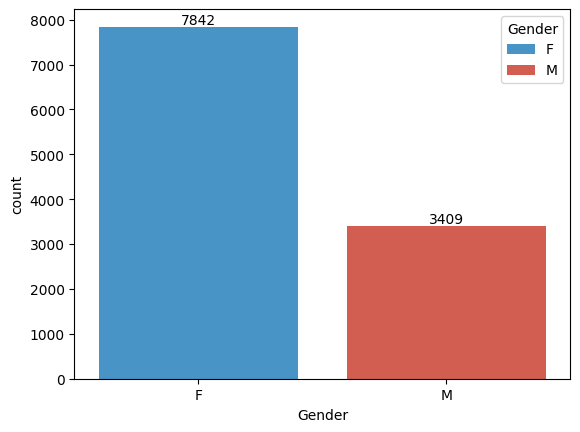

In [24]:
#gender column
# plot a bar graph on gender with its count of orders
custom_palette = ["#3498db", "#e74c3c"]

ax = sns.countplot(x='Gender', data=df ,hue="Gender" , legend=True , palette=custom_palette)

for bars in ax.containers:
    ax.bar_label(bars)

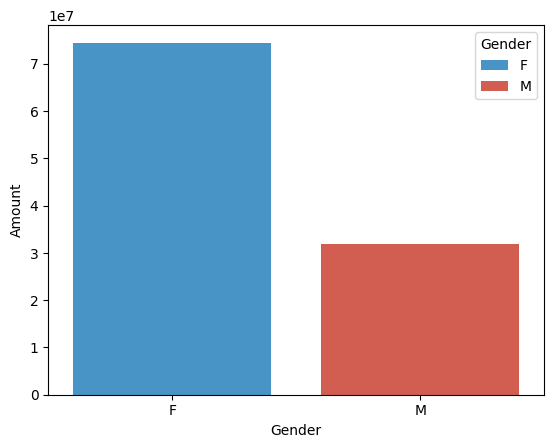

In [25]:
# plotting a bar with gender and amount 

sales_gen = df.groupby("Gender",as_index=False)["Amount"].sum()

custom_palette = ["#3498db", "#e74c3c"]

ax = sns.barplot(x='Gender', y="Amount" , data=sales_gen ,hue="Gender" , legend=True , palette=custom_palette)

# for bars in ax.containers:
#     ax.bar_label(bars)

*from above graphs we can say that most are female buyers and purchasing power is also greater than men*


<h4>AGE Column </h4>

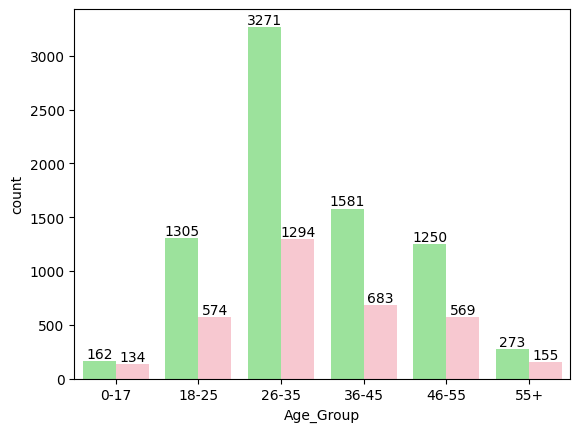

In [26]:
# plot a count plot on gender with its count of orders

custom_palette = ["lightgreen", "pink"]

ax = sns.countplot(data=df , x='Age_Group' , hue="Gender" , legend= False,palette=custom_palette)

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\vishnuvardhan\AppData\Local\Temp\ipykernel_24396\2060927912.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_age = df.groupby("Age_Group",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)


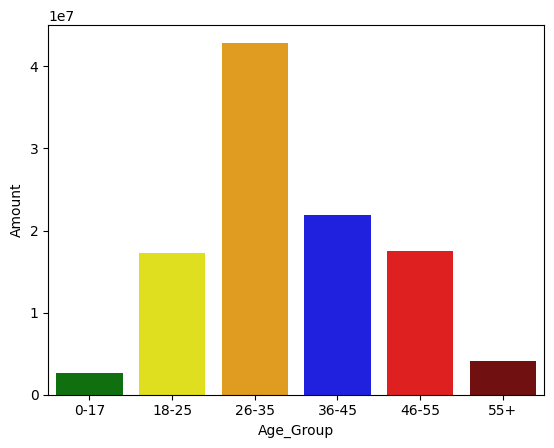

In [27]:
sales_age = df.groupby("Age_Group",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

custom_palette = ["green", "yellow" , "orange" , "Blue" , "red" , "maroon" ]

ax = sns.barplot(data=sales_age , x='Age_Group' ,y = "Amount" , hue="Age_Group", legend= False , palette=custom_palette)

# for bars in ax.containers:
#     ax.bar_label(bars)

From Above Graphs We Can See That Most Of The 26-35 Age Groups are Females and Having Purchasing Power Than Other Age Groups

<h4> STATE Column </h4>

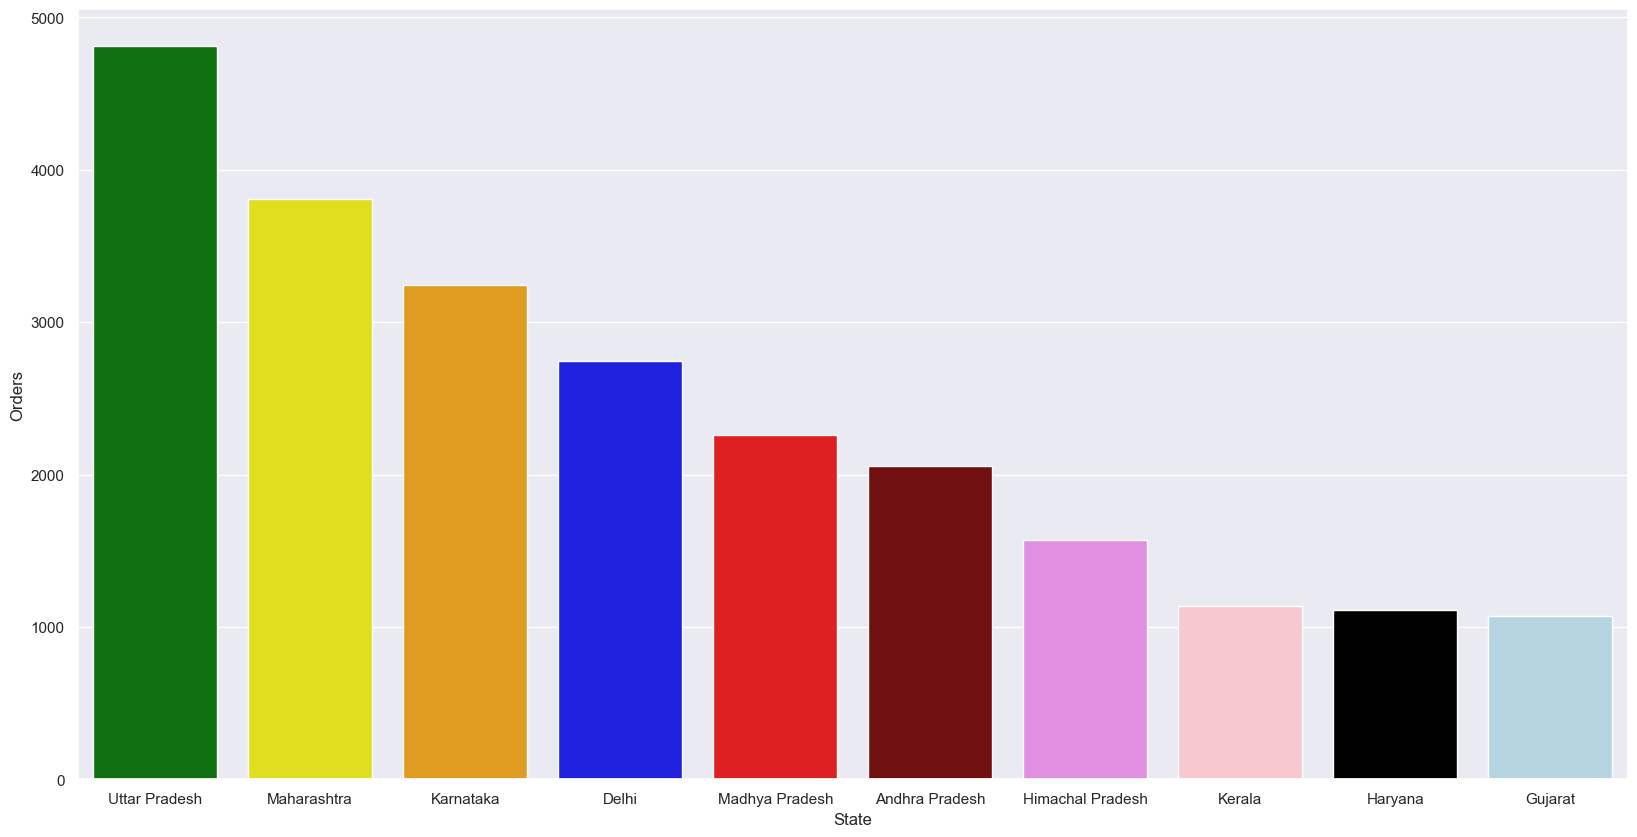

In [28]:
#TOTAL NUMBER OF ORDERS FROM TOP 10 STATES 

sales_state = df.groupby("State",as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)

custom_palette = ["green", "yellow" , "orange" , "Blue" , "red" , "maroon" ,"violet" , "pink" , "black" , "lightblue"]

sns.set(rc={"figure.figsize":(20,10)})
ax = sns.barplot(data=sales_state , x='State' ,y = "Orders" , hue="State", legend= False , palette=custom_palette)


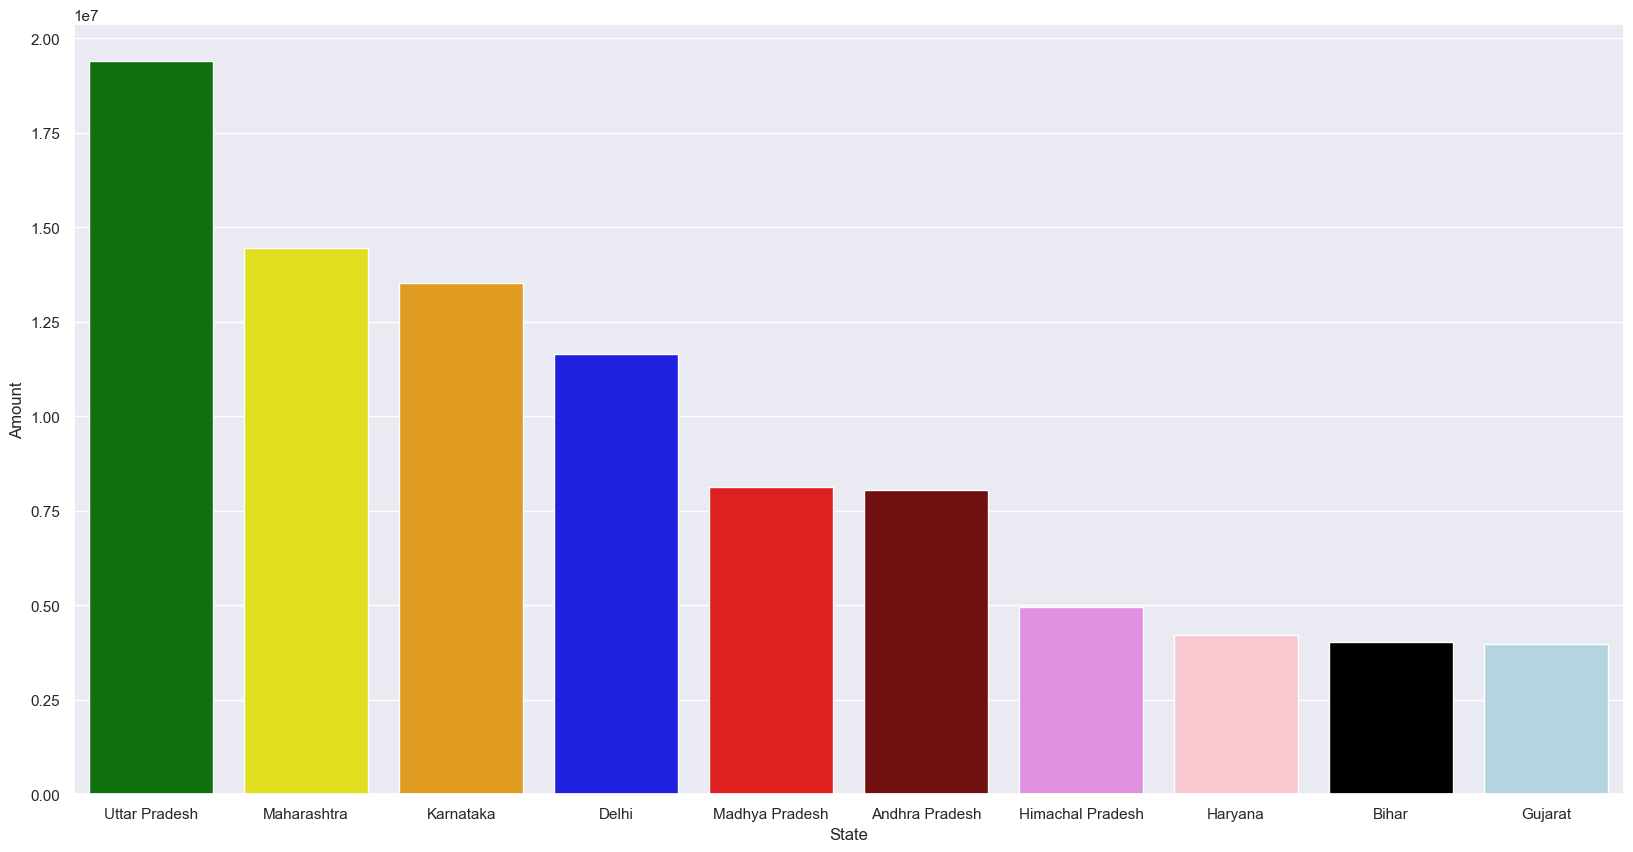

In [29]:
#TOTAL AMOUNT FROM TOP 10 STATES 

sales_state = df.groupby("State",as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)

custom_palette = ["green", "yellow" , "orange" , "Blue" , "red" , "maroon" ,"violet" , "pink" , "black" , "lightblue"]

sns.set(rc={"figure.figsize":(20,10)})
ax = sns.barplot(data=sales_state , x='State' ,y = "Amount" , hue="State", legend= False , palette=custom_palette)


From Above Graphs 
Amount and Orders are getting huge from top 7 States, where as we see orders from Kerala , but they are not present in top 10 in terms of getting Amount (Fig2) . 

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'State', 'Zone',
       'Occupation', 'Product_Category', 'Orders', 'Amount', 'Marital_Status',
       'Age_Group'],
      dtype='object')

<h4> Marital_Status COLUMN </h4>

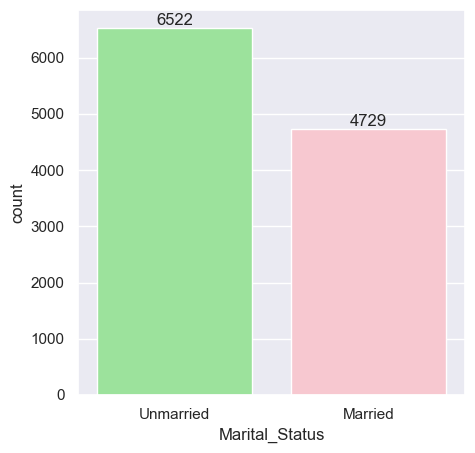

In [31]:
# plot a count plot on Marital_status with its count
custom_palette = ["lightgreen", "pink"]
sns.set(rc={"figure.figsize":(5,5)})
ax = sns.countplot(data=df , x='Marital_Status' ,hue="Marital_Status" , legend=False , palette=custom_palette)

for bars in ax.containers:
    ax.bar_label(bars)

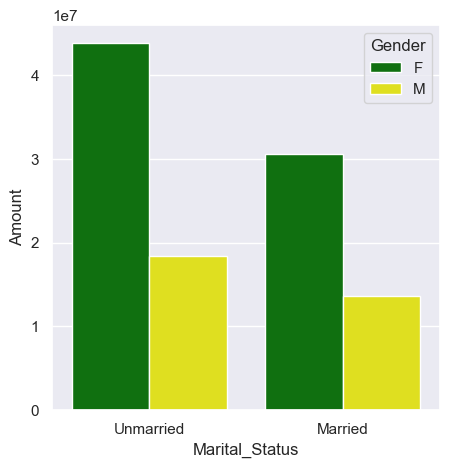

In [32]:
#AMOUNT GENERATED BY UNMARRIED MEN/FEMALE AND MARRIED MEN/FEMALE

amount_gen = df.groupby(["Marital_Status","Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

custom_palette = ["lightgreen", "pink"]
sns.set(rc={"figure.figsize":(5,5)})

custom_palette = ["green", "yellow"]

ax = sns.barplot(data=amount_gen , x='Marital_Status' , y = "Amount" , hue="Gender" , legend=True , palette=custom_palette)


# for bars in ax.containers:
#     ax.bar_label(bars)

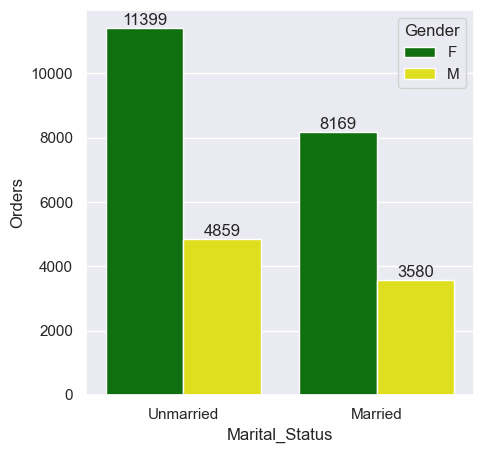

In [33]:
#ORDERS GENERATED BY UNMARRIED MEN/FEMALE AND MARRIED MEN/FEMALE

orders_gen = df.groupby(["Marital_Status","Gender"], as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)

custom_palette = ["lightgreen", "pink"]
sns.set(rc={"figure.figsize":(5,5)})

custom_palette = ["green", "yellow"]

ax = sns.barplot(data=orders_gen , x='Marital_Status' , y = "Orders" , hue="Gender" , legend=True , palette=custom_palette)


for bars in ax.containers:
    ax.bar_label(bars)

By Above Graphs , Its evitable that Unmarried Females and Married Females are Topping The Charts in PLacing Orders and purchasing Than Men .

<h4>Occupation Column</h4>

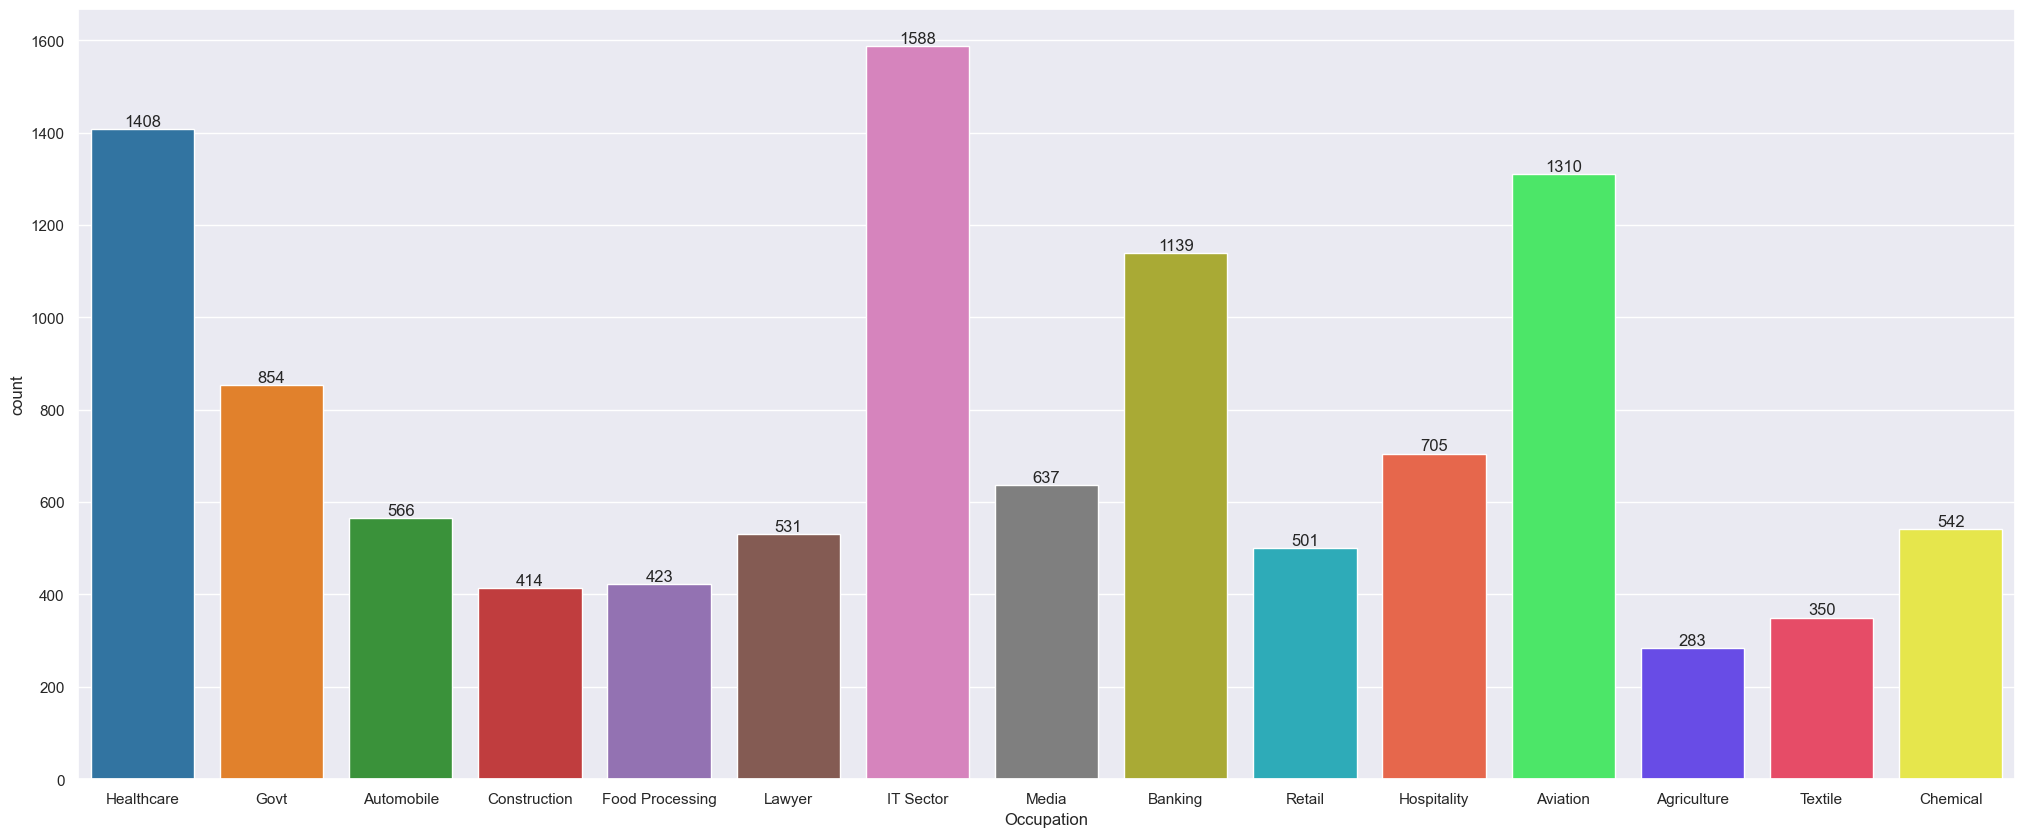

In [34]:
# plot a count plot on Occupation with its count of orders
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
                  "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
                  "#FF5733", "#33FF57", "#5733FF", "#FF3357", "#FFFF33"]

sns.set(rc={"figure.figsize":(25,10)})
ax = sns.countplot(data=df , x='Occupation' ,hue="Occupation",legend=False , palette=custom_palette)

for bars in ax.containers:
    ax.bar_label(bars)

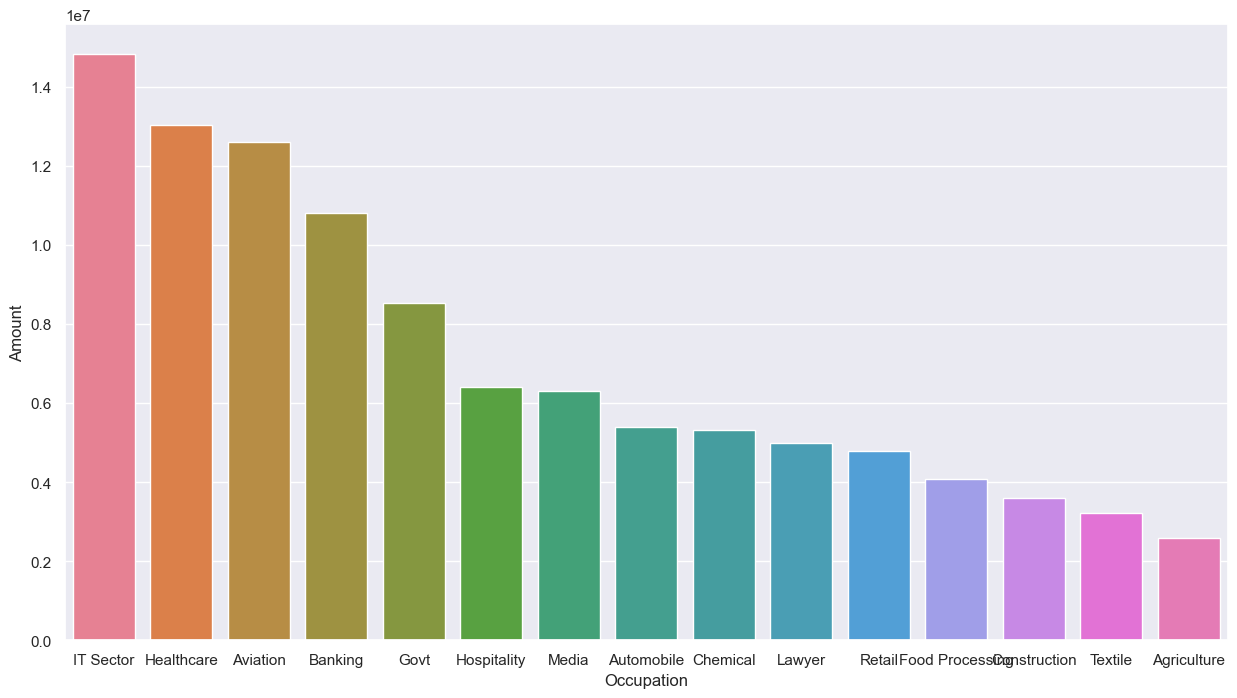

In [42]:
# plot a bar plot on Occupation with its amounts for each occupation

amounts_gen = df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
                  "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
                  "#FF5733", "#33FF57", "#5733FF", "#FF3357", "#FFFF33"]

sns.set(rc={"figure.figsize":(15,8)})

ax = sns.barplot(data=amounts_gen , x='Occupation' , y = "Amount", hue="Occupation" , legend=False)


By Above Graphs we Can say IT Sector Tops The Charts in Orders and Purchasing Power Behaviour .
Most Of The Buyers Are Working In IT , Healthcare and Aviation . 

<h4> Product_category Column </h4>

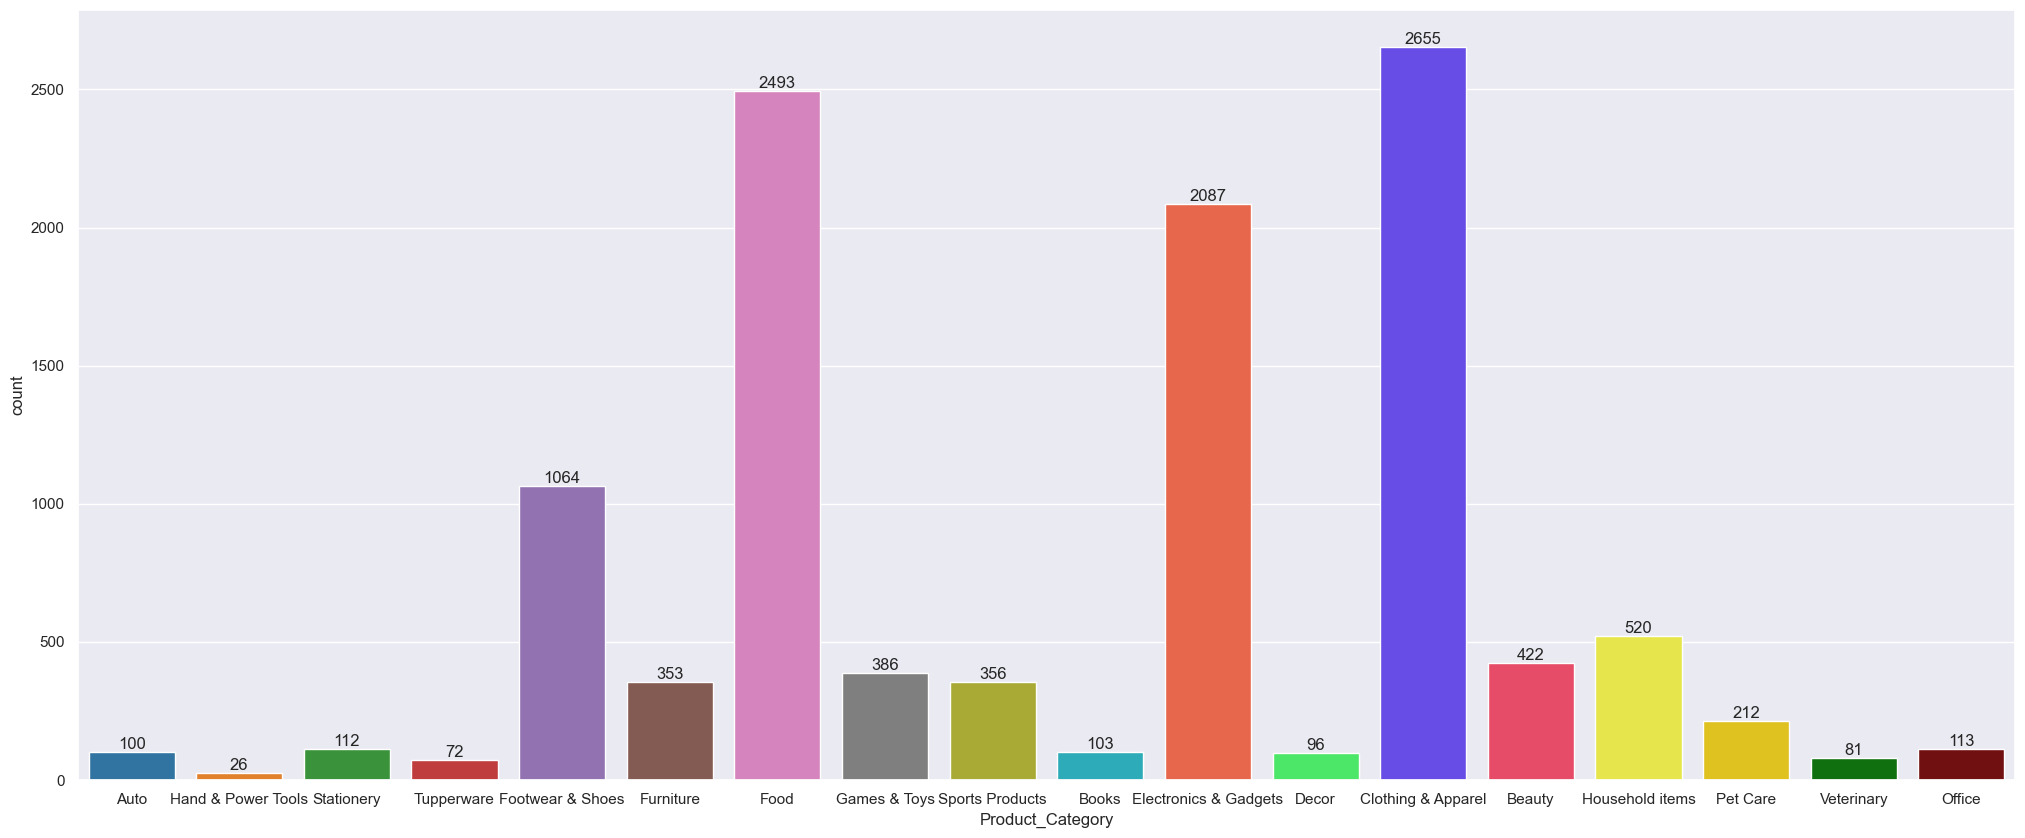

In [43]:
# plot a count plot on Product_Category with its Count Of Orders

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
                  "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
                  "#FF5733", "#33FF57", "#5733FF", "#FF3357", "#FFFF33","#FFD700","#008000",
"#800000"]

sns.set(rc={"figure.figsize":(25,10)})
ax = sns.countplot(data=df , x='Product_Category' ,hue="Product_Category",legend=False , palette=custom_palette)

for bars in ax.containers:
    ax.bar_label(bars)

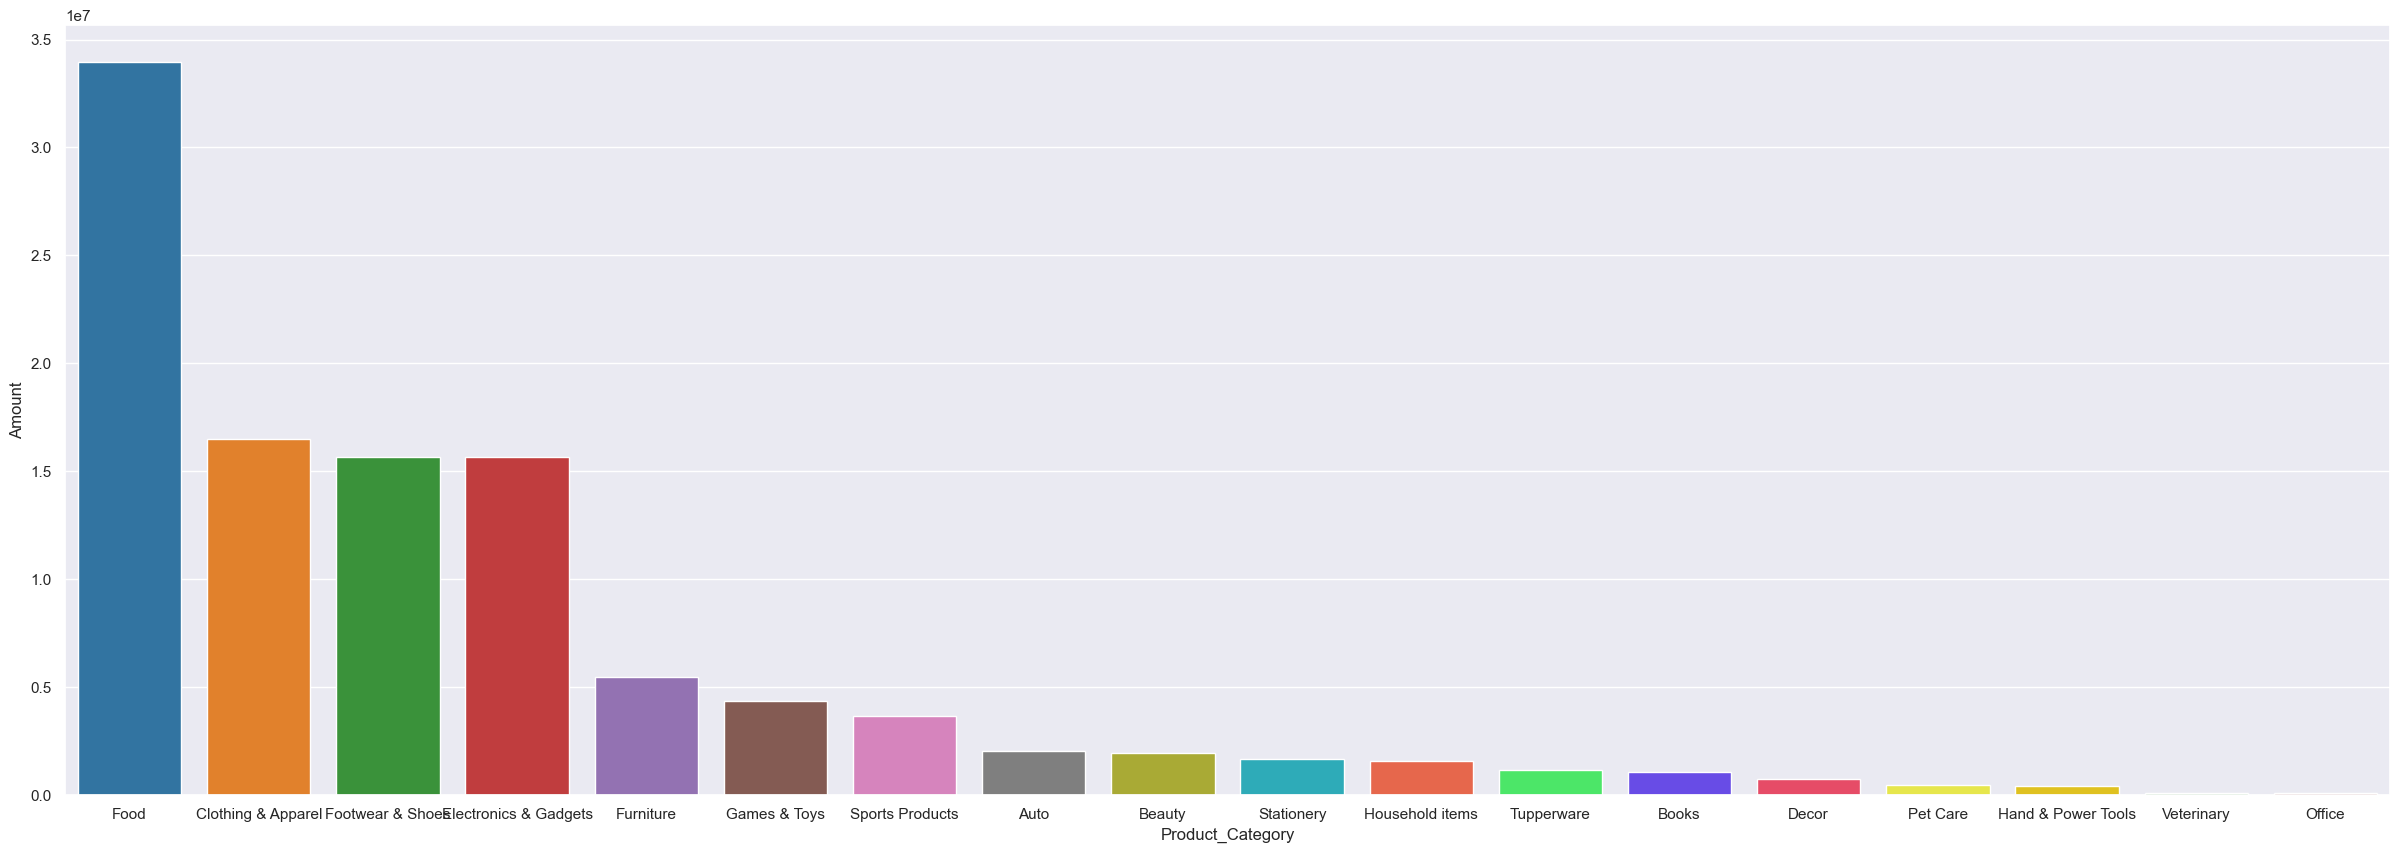

In [44]:
sales_by_category = df.groupby("Product_Category" ,as_index=False)["Amount"].sum().sort_values(by="Amount" , ascending=False)

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
                  "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
                  "#FF5733", "#33FF57", "#5733FF", "#FF3357", "#FFFF33" ,"#FFD700","#008000",
"#800000"]

sns.set(rc={"figure.figsize":(30,10)})
ax = sns.barplot(data=sales_by_category , x='Product_Category' ,y="Amount",hue="Product_Category",legend=False , palette=custom_palette)

# for bars in ax.containers:
#     ax.bar_label(bars)

IN Above Graphs , in terms of orders -> Clothing is Highest , but in generating Revenues -->  Food is the highest i.e 2x more than clothing in generating revenue

In [ ]:
df.columns

<h4> Product_ID Column </h4>

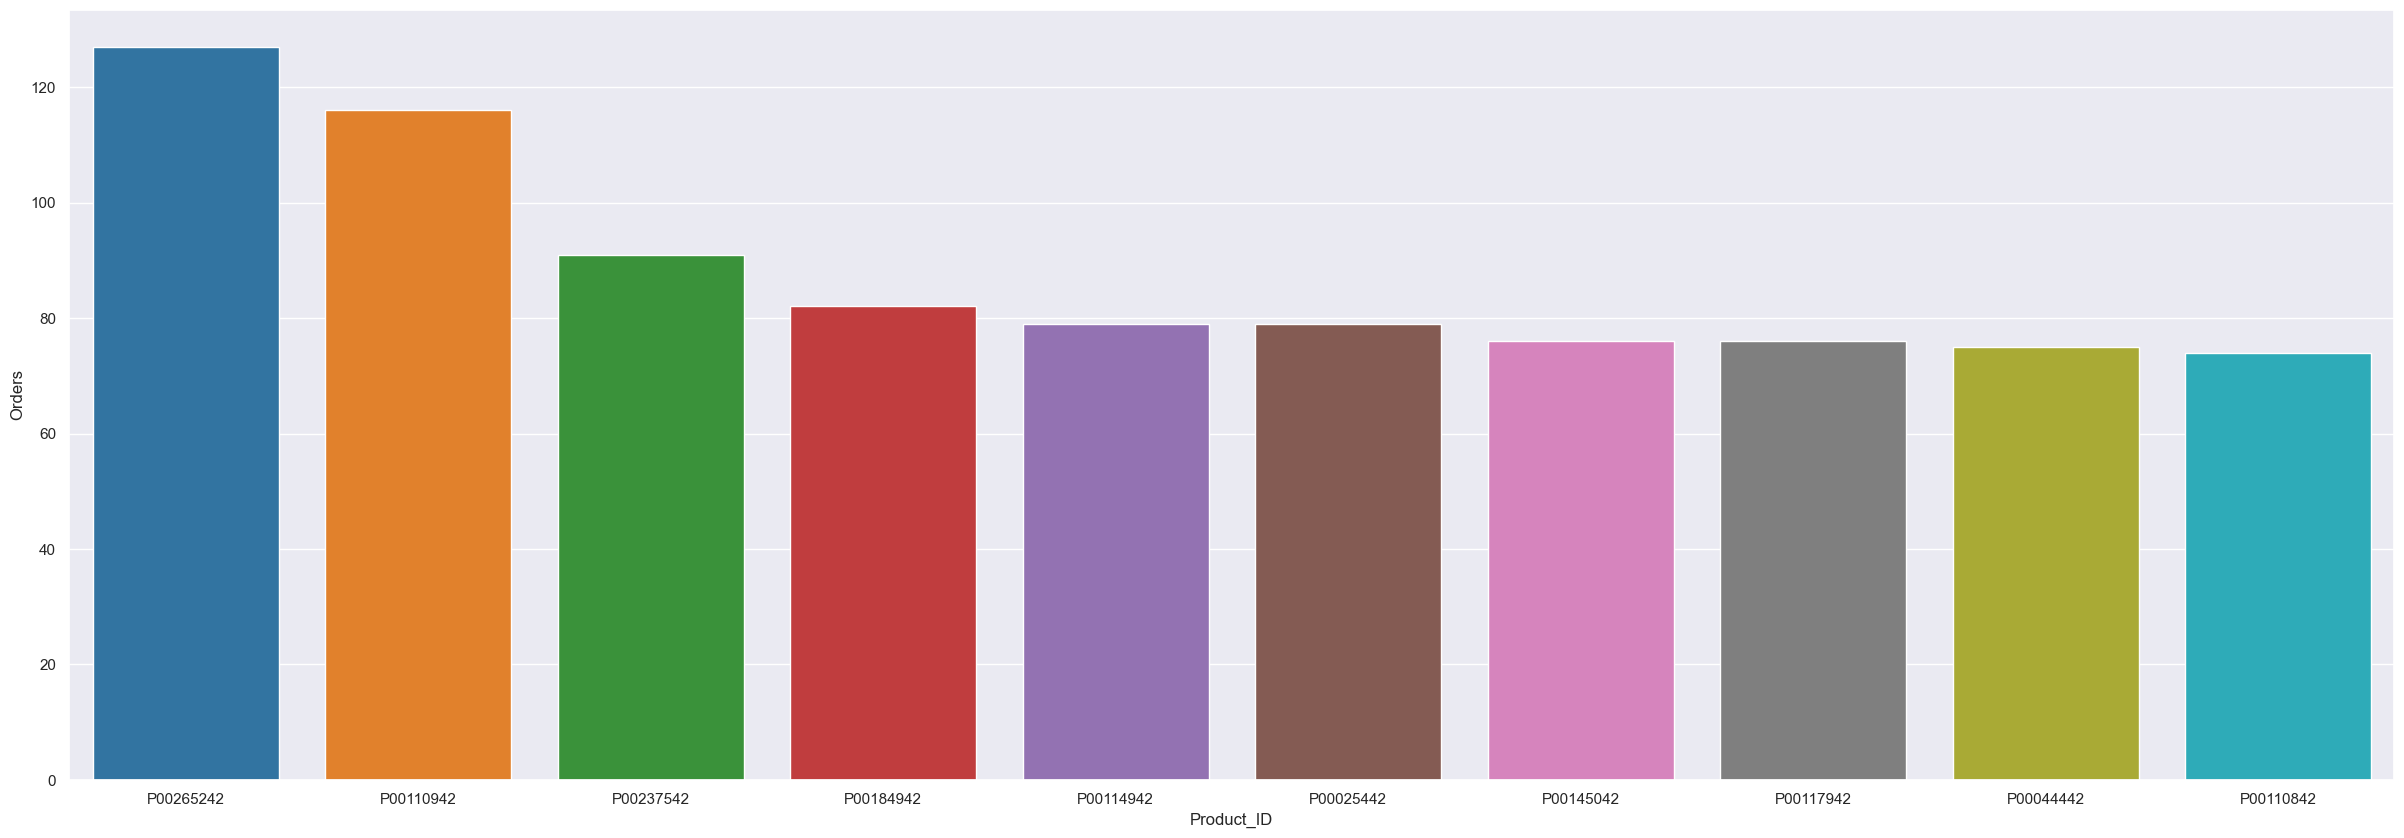

In [45]:
# top 10 most ordered products
orders_by_productID = df.groupby("Product_ID" ,as_index=False)["Orders"].sum().sort_values(by="Orders" , ascending=False)
top_10_ordered=orders_by_productID.head(10)
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
                  "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
                  ]

sns.set(rc={"figure.figsize":(30,10)})
ax = sns.barplot(data=top_10_ordered , x='Product_ID' ,y="Orders",hue="Product_ID",legend=False , palette=custom_palette)



<Axes: xlabel='Product_ID'>

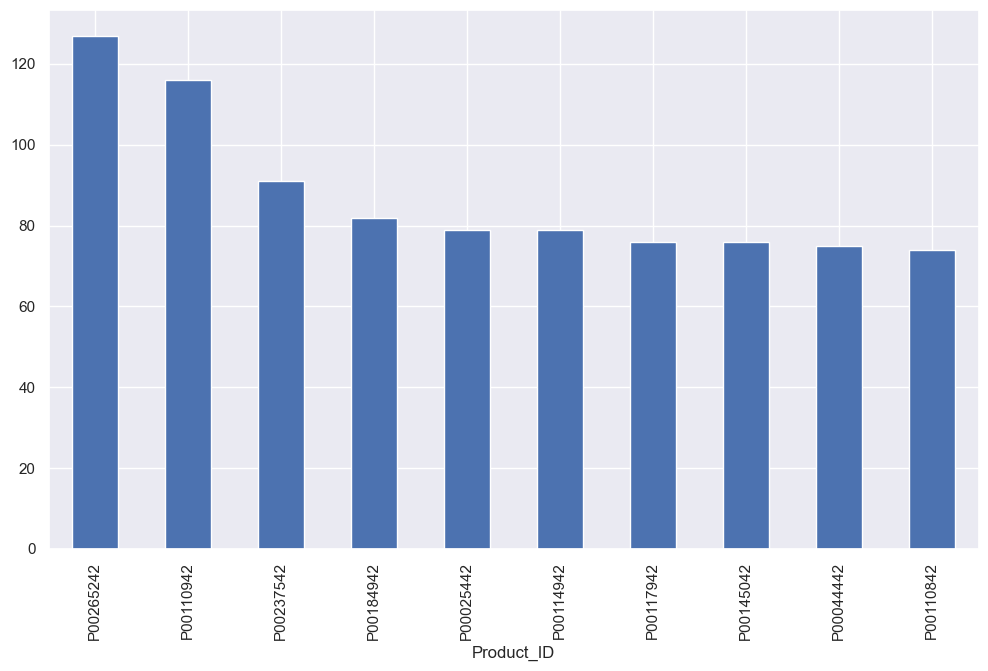

In [46]:
# same top 10 most ordered products with ID

plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar")


<Axes: xlabel='Product_ID'>

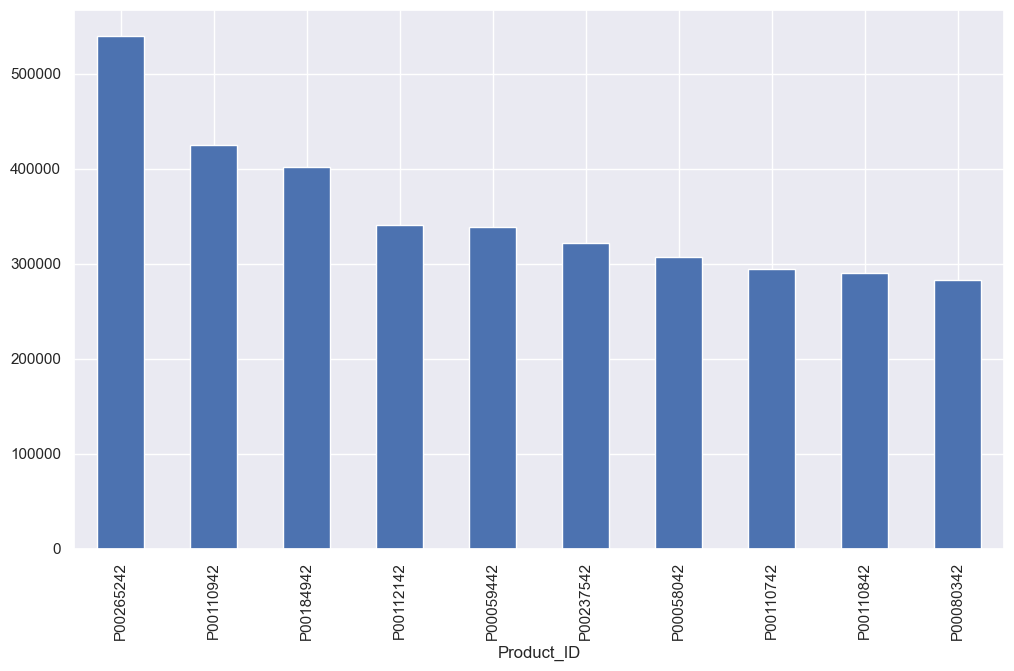

In [47]:
# same top 10 most revenue generated products ID

plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Amount'].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar")


By Above Graphs we get , those are top revenue generated products 

<h4> 
Customer Behaviours that i have understood after analysing this sales data is 
26-35 age group people are mostly of married/unmarried women are having purchasing power , mostly working in IT , HEALTHCARE , AVIATION SECTOR 
From Uttarpradesh , Maharastra , karnataka where sales are happening high . </n> buying categories majorly of food , clothing and apparel , footwear and shoes .
Mostly increase units of those top 10 productID and place them more in every outlets as they are generating more revenue. 
</h4>